In [1]:
import numpy as np
import re

In [2]:
data = "The sky is BLUE, and the sun is BRIGHT. Birds, fly in the SKY."
data

'The sky is BLUE, and the sun is BRIGHT. Birds, fly in the SKY.'

In [3]:
sentences = data.split('.')
sentences

['The sky is BLUE, and the sun is BRIGHT', ' Birds, fly in the SKY', '']

In [4]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['the sky is blue and the sun is bright', 'birds fly in the sky']

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[1, 2, 3, 4, 5, 1, 6, 3, 7], [8, 9, 10, 1, 2]]


In [7]:
index_to_word = {}
word_to_index = {}
word2id = tokenizer.word_index

for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
  
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value
        
vocab_size = len(word2id)
print('Vocabulary Size:', vocab_size)
print(index_to_word, "\n")
print(word_to_index)

Vocabulary Size: 10
{1: 'the', 2: 'sky', 3: 'is', 4: 'blue', 5: 'and', 6: 'sun', 7: 'bright', 8: 'birds', 9: 'fly', 10: 'in'} 

{'the': 1, 'sky': 2, 'is': 3, 'blue': 4, 'and': 5, 'sun': 6, 'bright': 7, 'birds': 8, 'fly': 9, 'in': 10}


In [8]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[1, 2, 4, 5], [2, 3, 5, 1], [3, 4, 1, 6], [4, 5, 6, 3], [5, 1, 3, 7], [8, 9, 1, 2]] 

[3, 4, 5, 1, 6, 10]


In [9]:
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['the', 'sky', 'blue', 'and']  ->  is
['sky', 'is', 'and', 'the']  ->  blue
['is', 'blue', 'the', 'sun']  ->  and
['blue', 'and', 'sun', 'is']  ->  the
['and', 'the', 'is', 'bright']  ->  sun


In [10]:
X = np.array(contexts)
Y = np.array(targets)

In [11]:
print(X)

[[1 2 4 5]
 [2 3 5 1]
 [3 4 1 6]
 [4 5 6 3]
 [5 1 3 7]
 [8 9 1 2]]


In [12]:
print(Y)

[ 3  4  5  1  6 10]


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

In [14]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X, Y, epochs=80)

Epoch 1/80

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 2.3975
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 2.3886
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 2.3802
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 2.3712
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 2.3611
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3333 - loss: 2.3495
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3333 - loss: 2.3364
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3333 - loss: 2.3215
Epoch 9/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3333 - loss: 2.3047
Epoch 10/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3333 - loss: 2.2858
Epoch 11/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3333 - loss: 2.2646
Epoch 12/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3333 - loss: 2.241

<Axes: >

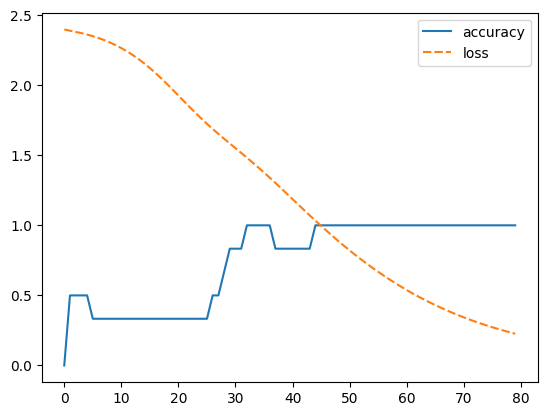

In [17]:
import seaborn as sns
sns.lineplot(model.history.history)

In [18]:
from sklearn.decomposition import PCA

embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In [19]:
print("The sky is BLUE, and the sun is BRIGHT. Birds, fly in the SKY.")

The sky is BLUE, and the sun is BRIGHT. Birds, fly in the SKY.


In [23]:
test_sentences = [
    "and the is bright",
    "the sky is"
]

In [24]:
for sent in test_sentences:
    test_words = sent.split(" ")
    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])   
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
pred  ['and', 'the', 'is', 'bright'] 
= sun 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
pred  ['the', 'sky', 'is'] 
= blue 


